# 🚀 차별화된 파생변수 탐색
## Kaggle Playground S6E1 - Student Test Scores

**목표**: 남들과 다른 접근법으로 숨겨진 패턴 찾기

---

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
import koreanize_matplotlib
koreanize_matplotlib.koreanize()

# 시각화 설정
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

In [17]:
# 데이터 로드 (경로 수정 필요)
df = pd.read_csv(r'E:\2026_1\캐글 공모전\playground-series-s6e1\train.csv')
print(f"데이터 크기: {df.shape}")
df.head()

데이터 크기: (630000, 13)


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


---
# 🎯 Part 1: 비선형 구간 효과 탐색

**가설**: study_hours가 무조건 높을수록 좋은 게 아니라 **최적 구간**이 있다

In [18]:
# study_hours 구간별 점수 분석
print("=" * 70)
print("📊 study_hours 구간별 시험 점수 분석")
print("=" * 70)

# 세밀한 구간으로 나누기
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['0-1h', '1-2h', '2-3h', '3-4h', '4-5h', '5-6h', '6-7h', '7-8h']
df['study_bin'] = pd.cut(df['study_hours'], bins=bins, labels=labels)

# 구간별 통계
study_stats = df.groupby('study_bin', observed=True)['exam_score'].agg(['mean', 'std', 'count'])
study_stats['증가량'] = study_stats['mean'].diff()
print(study_stats)

📊 study_hours 구간별 시험 점수 분석
                mean        std  count       증가량
study_bin                                       
0-1h       41.492653  12.481355  83449       NaN
1-2h       46.016745  12.683325  76574  4.524092
2-3h       53.083085  12.458016  79226  7.066340
3-4h       59.815602  12.783323  75826  6.732518
4-5h       66.163798  12.277674  81570  6.348195
5-6h       72.026945  12.383819  71315  5.863147
6-7h       77.875048  12.229280  75757  5.848103
7-8h       83.663015  11.571819  86283  5.787967


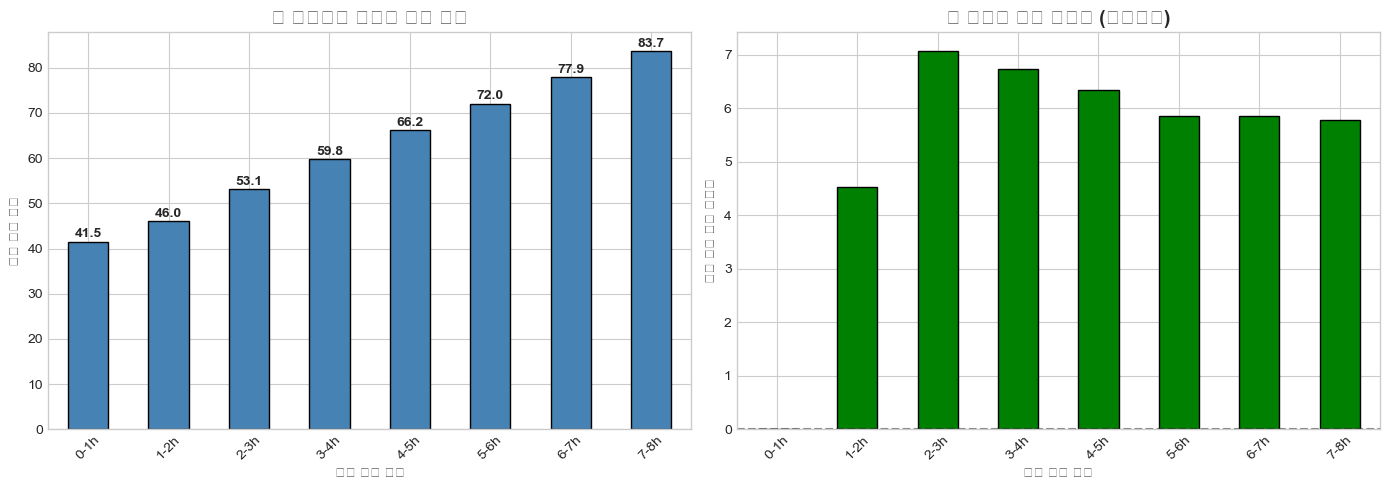


💡 인사이트:
• 증가량이 점점 줄어들면 → 수확체감 효과 존재
• 특정 구간에서 증가량이 급격히 떨어지면 → 최적 구간 존재


In [19]:
# 시각화: 구간별 평균 점수 + 증가량
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 평균 점수
study_stats['mean'].plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('📈 공부시간 구간별 평균 점수', fontsize=14, fontweight='bold')
axes[0].set_xlabel('공부 시간 구간')
axes[0].set_ylabel('평균 시험 점수')
axes[0].tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(study_stats['mean']):
    axes[0].text(i, v + 1, f'{v:.1f}', ha='center', fontweight='bold')

# 증가량 (한계효용 체감 확인)
colors = ['green' if x > 0 else 'red' for x in study_stats['증가량'].fillna(0)]
study_stats['증가량'].plot(kind='bar', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title('📉 구간별 점수 증가량 (한계효용)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('공부 시간 구간')
axes[1].set_ylabel('이전 구간 대비 증가량')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n💡 인사이트:")
print("• 증가량이 점점 줄어들면 → 수확체감 효과 존재")
print("• 특정 구간에서 증가량이 급격히 떨어지면 → 최적 구간 존재")

😴 sleep_hours 구간별 시험 점수 분석
                mean        std   count
sleep_bin                              
4-5h       58.223356  18.677936  103381
5-6h       59.368645  19.021722  105442
6-7h       61.953228  19.106637  100420
7-8h       62.977752  18.295820  104477
8-9h       65.245991  18.247979  106979
9-10h      66.962291  18.648730  109301


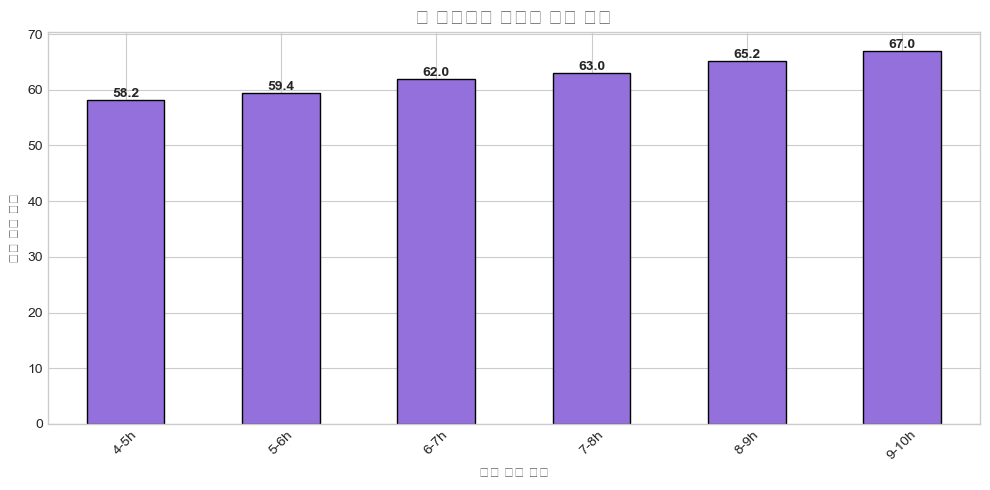


🎯 최적 수면 구간: 9-10h


In [20]:
# sleep_hours 최적 구간 분석 (7-8시간이 최적인지?)
print("=" * 70)
print("😴 sleep_hours 구간별 시험 점수 분석")
print("=" * 70)

sleep_bins = [4, 5, 6, 7, 8, 9, 10]
sleep_labels = ['4-5h', '5-6h', '6-7h', '7-8h', '8-9h', '9-10h']
df['sleep_bin'] = pd.cut(df['sleep_hours'], bins=sleep_bins, labels=sleep_labels)

sleep_stats = df.groupby('sleep_bin', observed=True)['exam_score'].agg(['mean', 'std', 'count'])
print(sleep_stats)

# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
sleep_stats['mean'].plot(kind='bar', color='mediumpurple', edgecolor='black', ax=ax)
ax.set_title('😴 수면시간 구간별 평균 점수', fontsize=14, fontweight='bold')
ax.set_xlabel('수면 시간 구간')
ax.set_ylabel('평균 시험 점수')
ax.tick_params(axis='x', rotation=45)

for i, v in enumerate(sleep_stats['mean']):
    ax.text(i, v + 0.5, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 최적 구간 찾기
optimal_sleep = sleep_stats['mean'].idxmax()
print(f"\n🎯 최적 수면 구간: {optimal_sleep}")

---
# 🎯 Part 2: 조건부 상호작용 검증

**가설**: sleep_quality가 poor면 아무리 공부해도 효과가 감소한다

🔍 sleep_quality별 공부시간 → 점수 상관관계
poor       → study_hours 효과: r = 0.7731 (p = 0.0000)
average    → study_hours 효과: r = 0.7800 (p = 0.0000)
good       → study_hours 효과: r = 0.7663 (p = 0.0000)


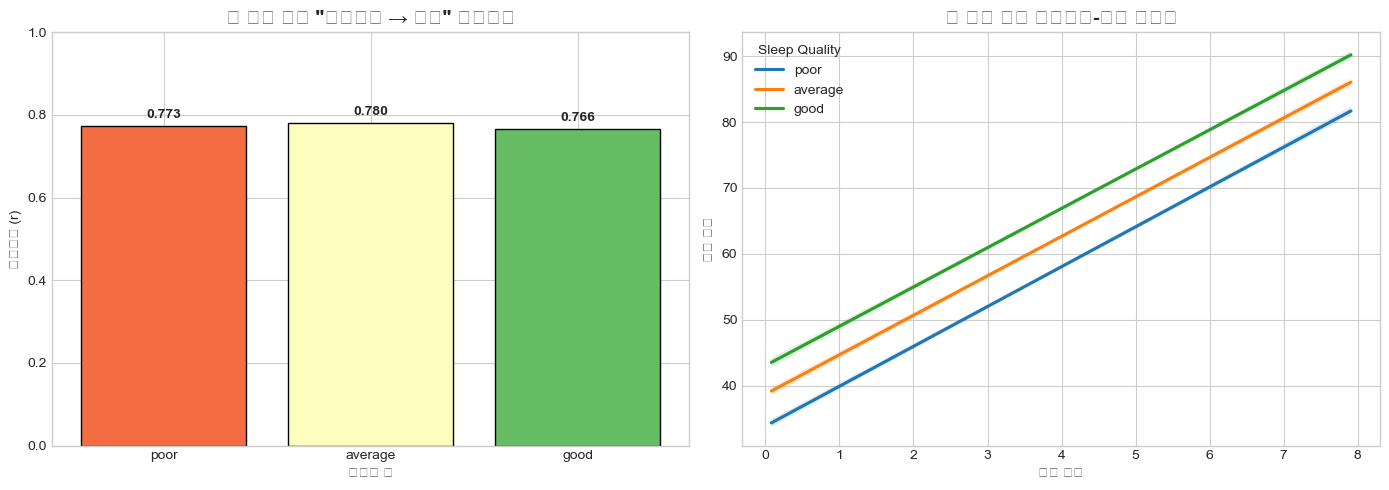


💡 인사이트:
✗ 조건부 효과 미미함. 다른 변수로 시도


In [21]:
# 핵심 검증: sleep_quality 그룹별 study_hours의 효과 차이
print("=" * 70)
print("🔍 sleep_quality별 공부시간 → 점수 상관관계")
print("=" * 70)

# 실제 데이터에 있는 값만 사용
sleep_order = ['poor', 'average', 'good']
correlations = {}

for quality in sleep_order:
    subset = df[df['sleep_quality'] == quality]
    if len(subset) >= 2:  # 상관계수 계산을 위해 최소 2개 이상 필요
        corr, p_value = stats.pearsonr(subset['study_hours'], subset['exam_score'])
        correlations[quality] = corr
        print(f"{quality:10} → study_hours 효과: r = {corr:.4f} (p = {p_value:.4f})")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 상관계수 비교
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(sleep_order)))
bars = axes[0].bar(sleep_order, correlations.values(), color=colors, edgecolor='black')
axes[0].set_title('🔗 수면 질별 "공부시간 → 점수" 상관계수', fontsize=14, fontweight='bold')
axes[0].set_xlabel('수면의 질')
axes[0].set_ylabel('상관계수 (r)')
axes[0].set_ylim(0, 1)

for bar, val in zip(bars, correlations.values()):
    axes[0].text(bar.get_x() + bar.get_width()/2, val + 0.02, f'{val:.3f}', 
                 ha='center', fontweight='bold')

# 회귀선 비교
for quality in sleep_order:
    subset = df[df['sleep_quality'] == quality].sample(min(5000, len(df[df['sleep_quality'] == quality])))
    sns.regplot(data=subset, x='study_hours', y='exam_score', 
                scatter=False, label=quality, ax=axes[1])

axes[1].set_title('📈 수면 질별 공부시간-점수 회귀선', fontsize=14, fontweight='bold')
axes[1].set_xlabel('공부 시간')
axes[1].set_ylabel('시험 점수')
axes[1].legend(title='Sleep Quality')

plt.tight_layout()
plt.show()

print("\n💡 인사이트:")
if correlations['good'] > correlations['poor'] + 0.05:
    print("✓ 조건부 효과 확인! 수면 질이 좋을수록 공부 효과가 더 큼")
    print("→ 'study_quality_adjusted' 파생변수 만들 가치 있음!")
else:
    print("✗ 조건부 효과 미미함. 다른 변수로 시도")

In [22]:
# facility_rating별 공부 효과 차이
print("=" * 70)
print("🔍 facility_rating별 공부시간 → 점수 상관관계")
print("=" * 70)

facility_order = ['low', 'medium', 'high']
facility_corrs = {}

for facility in facility_order:
    subset = df[df['facility_rating'] == facility]
    corr, p_value = stats.pearsonr(subset['study_hours'], subset['exam_score'])
    facility_corrs[facility] = corr
    print(f"{facility:10} → study_hours 효과: r = {corr:.4f}")

print("\n💡 시설이 좋을수록 공부 효과가 다른가?")
if facility_corrs['high'] > facility_corrs['low'] + 0.03:
    print("✓ 시설이 좋으면 공부 효과 증가!")
else:
    print("✗ 시설과 공부 효과는 독립적")

🔍 facility_rating별 공부시간 → 점수 상관관계
low        → study_hours 효과: r = 0.7738
medium     → study_hours 효과: r = 0.7688
high       → study_hours 효과: r = 0.7694

💡 시설이 좋을수록 공부 효과가 다른가?
✗ 시설과 공부 효과는 독립적


In [23]:
# study_method별 공부시간 효과 차이 (어떤 방법이 효율적인가?)
print("=" * 70)
print("🔍 study_method별 공부시간 → 점수 상관관계")
print("=" * 70)

method_corrs = {}
for method in df['study_method'].unique():
    subset = df[df['study_method'] == method]
    corr, _ = stats.pearsonr(subset['study_hours'], subset['exam_score'])
    method_corrs[method] = corr
    print(f"{method:15} → 공부 효율: r = {corr:.4f}")

# 정렬해서 보기
sorted_methods = sorted(method_corrs.items(), key=lambda x: x[1], reverse=True)
print("\n📊 공부 효율 순위:")
for i, (method, corr) in enumerate(sorted_methods, 1):
    print(f"  {i}위: {method} (r={corr:.4f})")

🔍 study_method별 공부시간 → 점수 상관관계
online videos   → 공부 효율: r = 0.7746
self-study      → 공부 효율: r = 0.7709
coaching        → 공부 효율: r = 0.7708
group study     → 공부 효율: r = 0.7640
mixed           → 공부 효율: r = 0.7748

📊 공부 효율 순위:
  1위: mixed (r=0.7748)
  2위: online videos (r=0.7746)
  3위: self-study (r=0.7709)
  4위: coaching (r=0.7708)
  5위: group study (r=0.7640)


---
# 🎯 Part 3: 이상치 분석 (핵심!)

**질문**: 공부 많이 했는데 점수 낮은 학생들의 특징은?

In [24]:
# 공부 많이 했는데 점수 낮은 그룹 vs 높은 그룹 비교
print("=" * 70)
print("🔍 공부 많이 한 학생(상위 25%) 중 성적 차이 분석")
print("=" * 70)

study_threshold = df['study_hours'].quantile(0.75)  # 상위 25%
high_studiers = df[df['study_hours'] >= study_threshold].copy()

print(f"공부 많이 한 학생 기준: {study_threshold:.2f}시간 이상")
print(f"해당 학생 수: {len(high_studiers):,}명")

# 이 중에서 점수 상위 vs 하위
score_median = high_studiers['exam_score'].median()
high_study_high_score = high_studiers[high_studiers['exam_score'] >= score_median]
high_study_low_score = high_studiers[high_studiers['exam_score'] < score_median]

print(f"\n점수 중앙값: {score_median:.1f}점")
print(f"높은 점수 그룹: {len(high_study_high_score):,}명 (평균 {high_study_high_score['exam_score'].mean():.1f}점)")
print(f"낮은 점수 그룹: {len(high_study_low_score):,}명 (평균 {high_study_low_score['exam_score'].mean():.1f}점)")

🔍 공부 많이 한 학생(상위 25%) 중 성적 차이 분석
공부 많이 한 학생 기준: 6.05시간 이상
해당 학생 수: 158,170명

점수 중앙값: 81.4점
높은 점수 그룹: 79,432명 (평균 91.2점)
낮은 점수 그룹: 78,738명 (평균 71.0점)


In [25]:
# 두 그룹 비교 분석
print("\n" + "=" * 70)
print("📊 같은 공부량인데 점수 차이가 나는 이유는?")
print("=" * 70)

# 범주형 변수 비교
categorical_cols = ['sleep_quality', 'study_method', 'facility_rating', 'gender', 'course']

for col in categorical_cols:
    print(f"\n📌 {col} 분포 비교:")
    high_dist = high_study_high_score[col].value_counts(normalize=True)
    low_dist = high_study_low_score[col].value_counts(normalize=True)
    
    comparison = pd.DataFrame({
        '고득점 그룹': high_dist,
        '저득점 그룹': low_dist
    }).fillna(0)
    comparison['차이'] = comparison['고득점 그룹'] - comparison['저득점 그룹']
    comparison = comparison.sort_values('차이', ascending=False)
    
    # 차이가 큰 것만 출력
    significant = comparison[abs(comparison['차이']) > 0.03]
    if len(significant) > 0:
        print(significant.round(3))


📊 같은 공부량인데 점수 차이가 나는 이유는?

📌 sleep_quality 분포 비교:
               고득점 그룹  저득점 그룹     차이
sleep_quality                       
good            0.459   0.269  0.191
poor            0.214   0.409 -0.195

📌 study_method 분포 비교:
               고득점 그룹  저득점 그룹     차이
study_method                        
coaching        0.313   0.128  0.185
group study     0.163   0.200 -0.037
online videos   0.157   0.231 -0.074
self-study      0.144   0.239 -0.095

📌 facility_rating 분포 비교:
                 고득점 그룹  저득점 그룹     차이
facility_rating                       
high              0.411   0.257  0.154
low               0.237   0.413 -0.176

📌 gender 분포 비교:
        고득점 그룹  저득점 그룹     차이
gender                       
other    0.364   0.324  0.040
male     0.309   0.355 -0.045

📌 course 분포 비교:


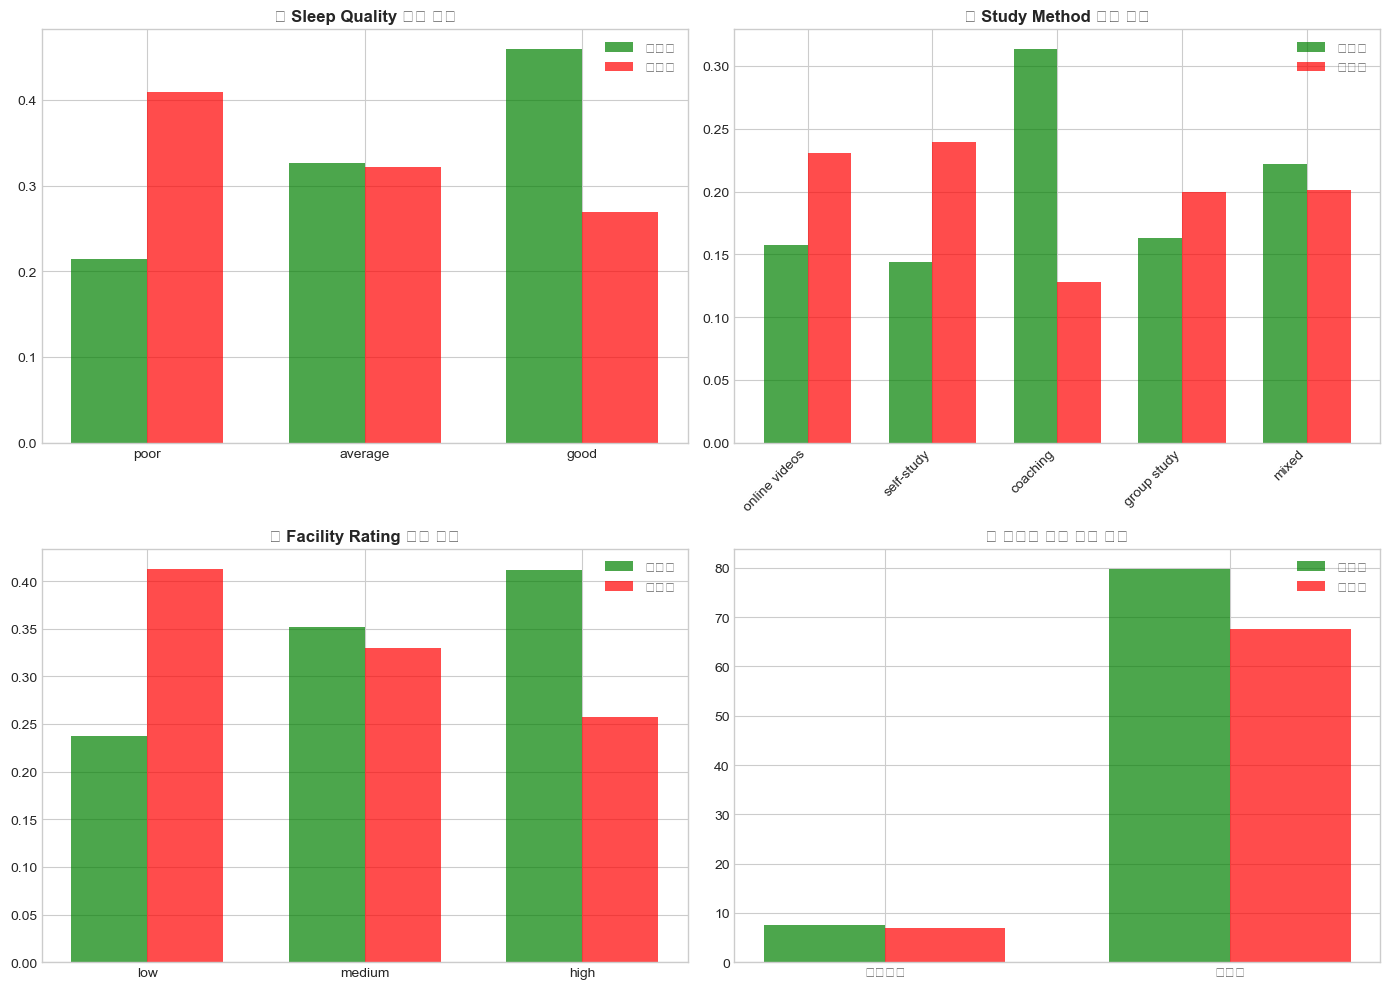

In [26]:
# 핵심 발견 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
width = 0.35  # 막대 너비 정의

# 1. sleep_quality 비교
ax = axes[0, 0]
sleep_order = ['poor', 'average', 'good']
high_sleep = high_study_high_score['sleep_quality'].value_counts(normalize=True).reindex(sleep_order)
low_sleep = high_study_low_score['sleep_quality'].value_counts(normalize=True).reindex(sleep_order)

x = np.arange(len(sleep_order))
ax.bar(x - width/2, high_sleep, width, label='고득점', color='green', alpha=0.7)
ax.bar(x + width/2, low_sleep, width, label='저득점', color='red', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(sleep_order)
ax.set_title('😴 Sleep Quality 분포 비교', fontweight='bold')
ax.legend()

# 2. study_method 비교
ax = axes[0, 1]
methods = df['study_method'].unique()
high_method = high_study_high_score['study_method'].value_counts(normalize=True).reindex(methods).fillna(0)
low_method = high_study_low_score['study_method'].value_counts(normalize=True).reindex(methods).fillna(0)

x = np.arange(len(methods))
ax.bar(x - width/2, high_method, width, label='고득점', color='green', alpha=0.7)
ax.bar(x + width/2, low_method, width, label='저득점', color='red', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha='right')
ax.set_title('📚 Study Method 분포 비교', fontweight='bold')
ax.legend()

# 3. facility_rating 비교
ax = axes[1, 0]
facility_order = ['low', 'medium', 'high']
high_facility = high_study_high_score['facility_rating'].value_counts(normalize=True).reindex(facility_order)
low_facility = high_study_low_score['facility_rating'].value_counts(normalize=True).reindex(facility_order)

x = np.arange(len(facility_order))
ax.bar(x - width/2, high_facility, width, label='고득점', color='green', alpha=0.7)
ax.bar(x + width/2, low_facility, width, label='저득점', color='red', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(facility_order)
ax.set_title('🏫 Facility Rating 분포 비교', fontweight='bold')
ax.legend()

# 4. 수치형 변수 비교
ax = axes[1, 1]
numeric_cols = ['sleep_hours', 'class_attendance']
high_means = [high_study_high_score[col].mean() for col in numeric_cols]
low_means = [high_study_low_score[col].mean() for col in numeric_cols]

x = np.arange(len(numeric_cols))
ax.bar(x - width/2, high_means, width, label='고득점', color='green', alpha=0.7)
ax.bar(x + width/2, low_means, width, label='저득점', color='red', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(['수면시간', '출석률'])
ax.set_title('📊 수치형 변수 평균 비교', fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

In [27]:
# 핵심 발견 정리
print("\n" + "=" * 70)
print("💡 핵심 발견: 공부 많이 해도 점수 낮은 이유")
print("=" * 70)

# 통계 검정
print("\n📊 통계 검정 결과:")

# sleep_quality 차이 검정
sleep_map = {'poor': 1, 'average': 2, 'good': 3}
high_sleep_num = high_study_high_score['sleep_quality'].map(sleep_map)
low_sleep_num = high_study_low_score['sleep_quality'].map(sleep_map)
stat, p = stats.mannwhitneyu(high_sleep_num, low_sleep_num)
print(f"  • sleep_quality: 고득점 평균 {high_sleep_num.mean():.2f} vs 저득점 {low_sleep_num.mean():.2f} (p={p:.4f})")

# facility_rating 차이 검정
facility_map = {'low': 1, 'medium': 2, 'high': 3}
high_fac_num = high_study_high_score['facility_rating'].map(facility_map)
low_fac_num = high_study_low_score['facility_rating'].map(facility_map)
stat, p = stats.mannwhitneyu(high_fac_num, low_fac_num)
print(f"  • facility_rating: 고득점 평균 {high_fac_num.mean():.2f} vs 저득점 {low_fac_num.mean():.2f} (p={p:.4f})")

# class_attendance 차이 검정
stat, p = stats.mannwhitneyu(high_study_high_score['class_attendance'], 
                             high_study_low_score['class_attendance'])
print(f"  • class_attendance: 고득점 평균 {high_study_high_score['class_attendance'].mean():.1f}% vs 저득점 {high_study_low_score['class_attendance'].mean():.1f}% (p={p:.4f})")


💡 핵심 발견: 공부 많이 해도 점수 낮은 이유

📊 통계 검정 결과:
  • sleep_quality: 고득점 평균 2.25 vs 저득점 1.86 (p=0.0000)
  • facility_rating: 고득점 평균 2.17 vs 저득점 1.84 (p=0.0000)
  • class_attendance: 고득점 평균 79.9% vs 저득점 67.7% (p=0.0000)


---
# 🎯 Part 4: 파생변수 생성 및 효과 검증

In [28]:
# 인코딩
sleep_quality_map = {'poor': 1, 'average': 2, 'good': 3}
facility_map = {'low': 1, 'medium': 2, 'high': 3}
difficulty_map = {'easy': 1, 'moderate': 2, 'hard': 3}

df['sleep_quality_num'] = df['sleep_quality'].map(sleep_quality_map)
df['facility_num'] = df['facility_rating'].map(facility_map)
df['difficulty_num'] = df['exam_difficulty'].map(difficulty_map)

print("=" * 70)
print("🔧 파생변수 생성")
print("=" * 70)

🔧 파생변수 생성


In [29]:
# 1. 비선형 구간 효과 피처
print("\n📌 1. 비선형 구간 효과 피처")

# 공부시간 최적 거리 (5시간을 최적으로 가정, 분석 결과에 따라 조정)
optimal_study = 5  # 앞선 분석 결과 확인 후 조정
df['study_optimal_dist'] = abs(df['study_hours'] - optimal_study)

# 수면 최적 구간 (7-8시간)
df['sleep_in_optimal'] = ((df['sleep_hours'] >= 7) & (df['sleep_hours'] <= 8)).astype(int)
df['sleep_deficit'] = np.maximum(0, 7 - df['sleep_hours'])
df['sleep_excess'] = np.maximum(0, df['sleep_hours'] - 8)

# 출석 임계점
df['attendance_low'] = (df['class_attendance'] < 70).astype(int)
df['attendance_high'] = (df['class_attendance'] >= 90).astype(int)

print("  • study_optimal_dist: |공부시간 - 최적값|")
print("  • sleep_in_optimal: 7~8시간 수면 여부")
print("  • sleep_deficit: 수면 부족량")
print("  • attendance_low/high: 출석률 임계점")


📌 1. 비선형 구간 효과 피처
  • study_optimal_dist: |공부시간 - 최적값|
  • sleep_in_optimal: 7~8시간 수면 여부
  • sleep_deficit: 수면 부족량
  • attendance_low/high: 출석률 임계점


In [30]:
# 2. 조건부 상호작용 피처
print("\n📌 2. 조건부 상호작용 피처")

# 수면 질 보정 공부시간
df['study_quality_adj'] = df['study_hours'] * (df['sleep_quality_num'] / 3)

# 시설 보정 공부시간
df['study_facility_adj'] = df['study_hours'] * (df['facility_num'] / 3)

# 난이도 대비 준비도
df['prep_vs_difficulty'] = df['study_hours'] / (df['difficulty_num'] + 0.5)

# 출석 + 수면질 시너지
df['attendance_sleep_synergy'] = (df['class_attendance'] / 100) * df['sleep_quality_num']

print("  • study_quality_adj: 공부시간 × (수면질/3)")
print("  • study_facility_adj: 공부시간 × (시설/3)")
print("  • prep_vs_difficulty: 공부시간 / 난이도")
print("  • attendance_sleep_synergy: 출석률 × 수면질")


📌 2. 조건부 상호작용 피처
  • study_quality_adj: 공부시간 × (수면질/3)
  • study_facility_adj: 공부시간 × (시설/3)
  • prep_vs_difficulty: 공부시간 / 난이도
  • attendance_sleep_synergy: 출석률 × 수면질


In [31]:
# 3. 효율성 지표
print("\n📌 3. 효율성 지표")

# 수면 대비 공부 비율
df['study_sleep_ratio'] = df['study_hours'] / (df['sleep_hours'] + 0.1)

# 깨어있는 시간 중 공부 비율
df['waking_study_ratio'] = df['study_hours'] / (24 - df['sleep_hours'])

# 총 투자시간
df['total_investment'] = df['study_hours'] + df['sleep_hours']

print("  • study_sleep_ratio: 공부/수면 비율")
print("  • waking_study_ratio: 깨어있는 시간 중 공부 비율")
print("  • total_investment: 총 투자시간 (공부+수면)")


📌 3. 효율성 지표
  • study_sleep_ratio: 공부/수면 비율
  • waking_study_ratio: 깨어있는 시간 중 공부 비율
  • total_investment: 총 투자시간 (공부+수면)


In [32]:
# 4. 학생 프로파일 유형
print("\n📌 4. 학생 프로파일 유형")

# 벼락치기형: 공부 많이 + 수면 부족
df['cramming_type'] = ((df['study_hours'] > 6) & (df['sleep_hours'] < 6)).astype(int)

# 균형형: 적절한 공부 + 적절한 수면
df['balanced_type'] = (
    (df['study_hours'] >= 3) & (df['study_hours'] <= 6) &
    (df['sleep_hours'] >= 6) & (df['sleep_hours'] <= 8)
).astype(int)

# 열심히형: 공부 많이 + 출석 높음
df['hardworking_type'] = ((df['study_hours'] > 5) & (df['class_attendance'] > 85)).astype(int)

# 출석만형: 출석은 높은데 공부 적음
df['attendance_only_type'] = ((df['class_attendance'] > 85) & (df['study_hours'] < 3)).astype(int)

print("  • cramming_type: 벼락치기형 (공부↑ + 수면↓)")
print("  • balanced_type: 균형형")
print("  • hardworking_type: 열심히형 (공부↑ + 출석↑)")
print("  • attendance_only_type: 출석만형")

# 각 유형별 평균 점수
print("\n📊 유형별 평균 점수:")
for col in ['cramming_type', 'balanced_type', 'hardworking_type', 'attendance_only_type']:
    type_mean = df[df[col] == 1]['exam_score'].mean()
    type_count = df[col].sum()
    print(f"  • {col}: 평균 {type_mean:.1f}점 ({type_count:,}명)")


📌 4. 학생 프로파일 유형
  • cramming_type: 벼락치기형 (공부↑ + 수면↓)
  • balanced_type: 균형형
  • hardworking_type: 열심히형 (공부↑ + 출석↑)
  • attendance_only_type: 출석만형

📊 유형별 평균 점수:
  • cramming_type: 평균 78.0점 (47,094명)
  • balanced_type: 평균 65.6점 (78,093명)
  • hardworking_type: 평균 84.2점 (73,942명)
  • attendance_only_type: 평균 54.3점 (58,794명)


In [33]:
# 5. 변환 피처
print("\n📌 5. 변환 피처")

# 로그 변환
df['study_log'] = np.log1p(df['study_hours'])

# 제곱 (비선형 효과)
df['study_sq'] = df['study_hours'] ** 2
df['sleep_sq'] = df['sleep_hours'] ** 2

# 제곱근 (수확체감)
df['study_sqrt'] = np.sqrt(df['study_hours'])

print("  • study_log: log(1 + 공부시간)")
print("  • study_sq: 공부시간²")
print("  • sleep_sq: 수면시간²")
print("  • study_sqrt: √공부시간")


📌 5. 변환 피처
  • study_log: log(1 + 공부시간)
  • study_sq: 공부시간²
  • sleep_sq: 수면시간²
  • study_sqrt: √공부시간


In [34]:
# 새 파생변수들의 상관관계 확인
print("\n" + "=" * 70)
print("📊 새 파생변수 효과 검증 (exam_score와 상관관계)")
print("=" * 70)

new_features = [
    'study_optimal_dist', 'sleep_in_optimal', 'sleep_deficit', 'sleep_excess',
    'attendance_low', 'attendance_high',
    'study_quality_adj', 'study_facility_adj', 'prep_vs_difficulty', 'attendance_sleep_synergy',
    'study_sleep_ratio', 'waking_study_ratio', 'total_investment',
    'cramming_type', 'balanced_type', 'hardworking_type', 'attendance_only_type',
    'study_log', 'study_sq', 'sleep_sq', 'study_sqrt'
]

correlations = []
for feat in new_features:
    corr, p = stats.spearmanr(df[feat], df['exam_score'])
    correlations.append({'feature': feat, 'correlation': corr, 'p_value': p})

corr_df = pd.DataFrame(correlations)
corr_df = corr_df.sort_values('correlation', key=abs, ascending=False)
corr_df['abs_corr'] = corr_df['correlation'].abs()

print(corr_df.to_string(index=False))


📊 새 파생변수 효과 검증 (exam_score와 상관관계)
                 feature  correlation      p_value  abs_corr
      waking_study_ratio     0.778136 0.000000e+00  0.778136
              study_sqrt     0.769757 0.000000e+00  0.769757
                study_sq     0.769757 0.000000e+00  0.769757
               study_log     0.769757 0.000000e+00  0.769757
       study_quality_adj     0.740065 0.000000e+00  0.740065
      study_facility_adj     0.723062 0.000000e+00  0.723062
        total_investment     0.703750 0.000000e+00  0.703750
      prep_vs_difficulty     0.700006 0.000000e+00  0.700006
       study_sleep_ratio     0.665438 0.000000e+00  0.665438
      study_optimal_dist    -0.452596 0.000000e+00  0.452596
        hardworking_type     0.413579 0.000000e+00  0.413579
attendance_sleep_synergy     0.368183 0.000000e+00  0.368183
          attendance_low    -0.297259 0.000000e+00  0.297259
           cramming_type     0.241248 0.000000e+00  0.241248
         attendance_high     0.240548 0.000000e+00

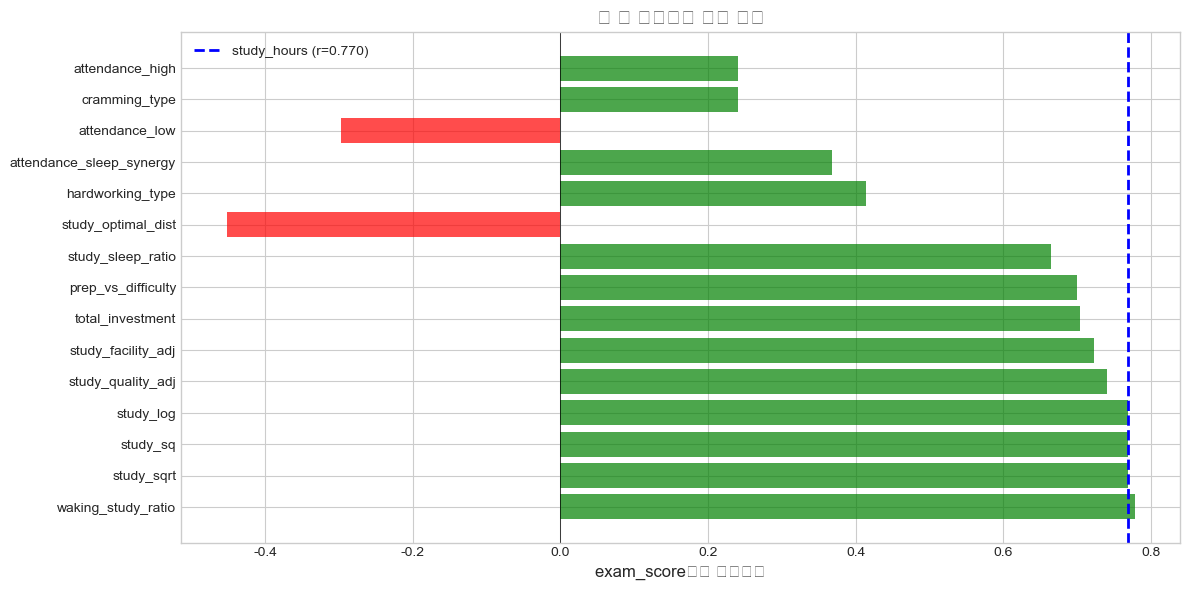


💡 파란 점선: 기존 study_hours의 상관계수
→ 이보다 높은 파생변수가 있으면 유용!


In [35]:
# 상위 10개 파생변수 상관관계 시각화
fig, ax = plt.subplots(figsize=(12, 6))

top_features = corr_df.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['correlation']]

bars = ax.barh(top_features['feature'], top_features['correlation'], color=colors, alpha=0.7)
ax.set_xlabel('exam_score와의 상관계수', fontsize=12)
ax.set_title('🔥 새 파생변수 효과 순위', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# 기존 study_hours 상관계수 표시
original_corr, _ = stats.spearmanr(df['study_hours'], df['exam_score'])
ax.axvline(x=original_corr, color='blue', linestyle='--', linewidth=2, label=f'study_hours (r={original_corr:.3f})')
ax.legend()

plt.tight_layout()
plt.show()

print("\n💡 파란 점선: 기존 study_hours의 상관계수")
print("→ 이보다 높은 파생변수가 있으면 유용!")

---
# 🎯 Part 5: 최종 추천 피처 정리

In [36]:
# 최종 추천 피처
print("=" * 70)
print("🏆 최종 추천 파생변수")
print("=" * 70)

# 상관계수 절대값 0.1 이상인 피처
good_features = corr_df[corr_df['abs_corr'] >= 0.1]['feature'].tolist()

print("\n✅ 효과가 검증된 파생변수:")
for i, feat in enumerate(good_features, 1):
    corr = corr_df[corr_df['feature'] == feat]['correlation'].values[0]
    print(f"  {i}. {feat}: r = {corr:.4f}")

print("\n❌ 효과가 미미한 파생변수 (제외 권장):")
weak_features = corr_df[corr_df['abs_corr'] < 0.05]['feature'].tolist()
for feat in weak_features:
    corr = corr_df[corr_df['feature'] == feat]['correlation'].values[0]
    print(f"  • {feat}: r = {corr:.4f}")

🏆 최종 추천 파생변수

✅ 효과가 검증된 파생변수:
  1. waking_study_ratio: r = 0.7781
  2. study_sqrt: r = 0.7698
  3. study_sq: r = 0.7698
  4. study_log: r = 0.7698
  5. study_quality_adj: r = 0.7401
  6. study_facility_adj: r = 0.7231
  7. total_investment: r = 0.7037
  8. prep_vs_difficulty: r = 0.7000
  9. study_sleep_ratio: r = 0.6654
  10. study_optimal_dist: r = -0.4526
  11. hardworking_type: r = 0.4136
  12. attendance_sleep_synergy: r = 0.3682
  13. attendance_low: r = -0.2973
  14. cramming_type: r = 0.2412
  15. attendance_high: r = 0.2405
  16. sleep_sq: r = 0.1600
  17. attendance_only_type: r = -0.1524
  18. sleep_deficit: r = -0.1470
  19. sleep_excess: r = 0.1347

❌ 효과가 미미한 파생변수 (제외 권장):
  • sleep_in_optimal: r = 0.0126


In [37]:
# 최종 피처 엔지니어링 함수
def create_final_features(df):
    """
    검증된 파생변수만 생성하는 함수
    train과 test 모두에 적용
    """
    df = df.copy()
    
    # 인코딩
    sleep_map = {'poor': 1, 'average': 2, 'good': 3}
    facility_map = {'low': 1, 'medium': 2, 'high': 3}
    difficulty_map = {'easy': 1, 'moderate': 2, 'hard': 3}
    
    df['sleep_quality_num'] = df['sleep_quality'].map(sleep_map)
    df['facility_num'] = df['facility_rating'].map(facility_map)
    df['difficulty_num'] = df['exam_difficulty'].map(difficulty_map)
    
    # 효과 검증된 피처들만 생성 (결과에 따라 수정)
    # 조건부 상호작용
    df['study_quality_adj'] = df['study_hours'] * (df['sleep_quality_num'] / 3)
    df['study_facility_adj'] = df['study_hours'] * (df['facility_num'] / 3)
    df['attendance_sleep_synergy'] = (df['class_attendance'] / 100) * df['sleep_quality_num']
    
    # 비선형 피처
    df['study_sqrt'] = np.sqrt(df['study_hours'])
    df['study_log'] = np.log1p(df['study_hours'])
    df['study_sq'] = df['study_hours'] ** 2
    df['sleep_sq'] = df['sleep_hours'] ** 2
    
    # 프로파일
    df['balanced_type'] = (
        (df['study_hours'] >= 3) & (df['study_hours'] <= 6) &
        (df['sleep_hours'] >= 6) & (df['sleep_hours'] <= 8)
    ).astype(int)
    
    return df

print("✅ create_final_features() 함수 정의 완료")
print("\n사용법:")
print("  train = create_final_features(train)")
print("  test = create_final_features(test)")

✅ create_final_features() 함수 정의 완료

사용법:
  train = create_final_features(train)
  test = create_final_features(test)
